In [1]:
from sklearn.datasets import make_blobs

# data
X, y = make_blobs(n_samples=100, centers=5, n_features=2,random_state=42)

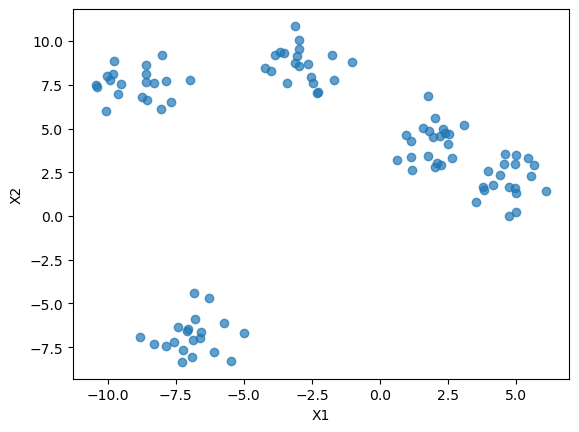

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], alpha=0.7)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [3]:
import os
os.OMP_NUM_THREADS = '1'

### K-means

In [4]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 4, 0, 4, 3, 1, 2, 2, 2, 0, 0, 1, 4, 0, 2, 3, 4, 4, 1, 3, 3, 2,
       0, 1, 3, 3, 4, 4, 4, 2, 1, 3, 4, 4, 4, 3, 0, 0, 0, 2, 1, 2, 2, 2,
       3, 0, 0, 1, 3, 4, 4, 2, 2, 1, 2, 3, 4, 4, 0, 0, 2, 0, 3, 1, 3, 1,
       4, 4, 1, 4, 3, 1, 1, 1, 4, 3, 2, 3, 4, 1, 4, 1, 3, 2, 3, 0, 3, 0,
       0, 0, 3, 0, 1, 2, 1, 0, 1, 0, 2, 2])

In [5]:
kmeans.cluster_centers_

array([[-2.87559086,  8.66758942],
       [-6.88732163, -6.84846391],
       [ 4.73987759,  2.0192694 ],
       [-8.97484095,  7.55134937],
       [ 1.90144007,  4.22597687]])

#### Assigning New Instances To the Cluster

In [6]:
import numpy as np

X_new = np.array([[0,2], [3,2], [-3,3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 2, 4, 4])

#### Hard Clustering directly assign instances to the cluster while soft clustering gives a score for each cluster. The score can be distance/similarity.

In [7]:
kmeans.transform(X_new)

array([[ 7.26125137, 11.21296182,  4.73991676, 10.55297351,  2.92753264],
       [ 8.88703081, 13.26855089,  1.73998429, 13.19902632,  2.48229872],
       [ 5.66895471, 10.58789455,  7.80176503,  7.51089246,  5.05243843],
       [ 6.16884405, 10.12447762,  7.75479252,  7.82399226,  5.19645176]])

### Centroid Initialization Methods
If we know that where the centroids should be, then we can set the init hyperparameter.

In [8]:
good_init = np.array([[-3,7], [-6,-6], [4,2], [-8,7], [2,5]])

kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init=array([[-3,  7],
       [-6, -6],
       [ 4,  2],
       [-8,  7],
       [ 2,  5]]),
       n_clusters=5, n_init=1, random_state=42)

#### Another good solution is to run the algorithm multiple times with different random initialization, which n_init does in Scikit-Learn. Default value of n_init is 10, Scikit-Learn keeps the best value out of 10 random initializations. But how can Scikit-Learn measures whether the cluster is good or not! It uses performance metric called models inertia, that is the sum of squared distance between the instances and their closest centroids.

In [9]:
kmeans.inertia_

159.83755106823412

In [10]:
kmeans.score(X) # negative inertia

-159.83755106823412

### The Mini-Batch K-Means Clustering Algorithm

In [11]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, n_init=10)
minibatch_kmeans.fit(X)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=5, n_init=10, random_state=42)

In [12]:
minibatch_kmeans.inertia_

160.4247168625568

### Finding The Right Numbers of Clusters (K)

In [13]:
from sklearn.metrics import silhouette_score

k = [3,4,5,6,7,8]
inertias = []
silhouette_scores = []

for k_i in k:
    kmeans_i = KMeans(n_clusters=k_i, random_state=42)
    kmeans_i.fit(X)
    inertias.append(kmeans_i.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans_i.labels_))

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMean

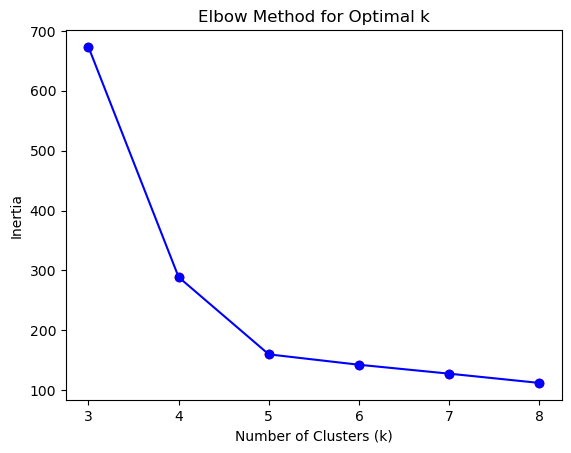

In [14]:
plt.plot(k, inertias, marker='o', linestyle='-', color='b')  # Line plot with circles
plt.scatter(k, inertias, color='r')  # Scatter plot with circles at data points

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.show()

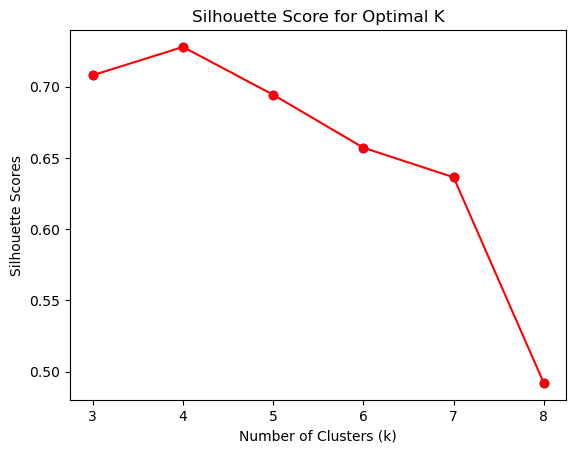

In [16]:
plt.plot(k, silhouette_scores, marker='o', linestyle='-', color='r') 
plt.scatter(k, silhouette_scores, color='b')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Score for Optimal K')

plt.show()